In [1]:
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
import json
import time
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
image_pred = pd.read_csv("image_predictions.tsv", sep='\t')

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [5]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [6]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
image_pred.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
image_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [10]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
with open("tweet_json.txt") as file:
    twt_data = json.load(file)
tweet_info = pd.DataFrame(columns=["tweet_id", "timestamp", "retweet_count", "favorite_count"])
for twt in twt_data["tweets"]:
    tweet_info = tweet_info.append({"tweet_id":twt['id'], "timestamp":twt['created_at']\
                                   ,"retweet_count":twt['retweet_count'], "favorite_count":\
                                    twt['favorite_count']},ignore_index = True) 
    

In [12]:
tweet_info.head(5)

,tweet_id,timestamp,retweet_count,favorite_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,8330,38100
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,6154,32690
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,4072,24599
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,8474,41456
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,9168,39628


In [13]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 4 columns):
tweet_id          2340 non-null object
timestamp         2340 non-null object
retweet_count     2340 non-null object
favorite_count    2340 non-null object
dtypes: object(4)
memory usage: 73.2+ KB


# Assess

## Quality Issues


### `twitter_archive` table
<ul>
    <li>timestamp to date time data type</li>
    <li>tweet_id to be converted to string data type from integer</li>
    <li>contains retweets</li>
    <li>unnecessary columns present [retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id]</li>                                 
</ul>

### `image_pred` table
<ul>
    <li>"a" tags in source</li>    
    <li>"_" used as separator in p1 column of image_pred df</li>
    <li>"_" used as separator in p2 column of image_pred df</li>
    <li>"_" used as separator in p3 column of image_pred df</li>
    <li>tweet_id in image_pred to be converted to string data type from integer</li>
    <li>image_num to String data type</li>
    <li> "-" in certain letters to split them</li>
    <li>Not all first names, second names and third names are capitalized</li>
</ul>

### `tweet_info` table
<ul>
    <li>timestamp should be date time data type</li>
    <li>retweet_count column should be integer</li>
    <li>favorite_count should be integer</li>
</ul>

## Tidiness Issues

<ul>
    <li>Type of dog in "doggo", "floofer", "pupper", "puppo" columns instead of one column.</li>
    <li>`tweet_info` table should be a part of `twitter_archive` table</li>
</ul>

# Clean

In [14]:
twitter_clean = twitter_archive.copy()
image_pred_clean = image_pred.copy()
tweet_info_clean = tweet_info.copy()

## `twitter_archive` has retweets present in it

### Define

Get indices of rows that contain retweets, drop these rows and reindex

### Code

In [15]:
temp_df = twitter_clean[twitter_clean.retweeted_status_id.notnull()]
retweet_indices = list(temp_df.index.values)
twitter_clean.drop(index=retweet_indices, axis=0, inplace=True)
twitter_clean=twitter_clean.reset_index(drop=True)

### Test

In [16]:
twitter_clean[twitter_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## `twitter_archive` Unnecessary columns present in table

### Define

Remove retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id columns as they are not necessary for our analyses.

### Code

In [17]:
twitter_clean.drop(["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", \
                    "in_reply_to_status_id", "in_reply_to_user_id"], axis=1, inplace=True)


### Test

In [18]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 204.0+ KB


## `twitter_archive`: timestamp to date time data type

### Define

timestamp column is in object data type and changing it to date_time date type makes analysis easier

### Code

In [19]:
twitter_clean["timestamp"] = pd.to_datetime(twitter_archive["timestamp"])

### Test

In [20]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 204.0+ KB


## `image_pred`: HTML a tags in source column

### Define

URL links are enclosed inside opening and closing "a" tags.

### Code

In [21]:
twitter_clean["source"] = twitter_clean["source"].str.extract(r'(http[^\"^\s]*)')

### Test

In [22]:
twitter_clean.source.sample(10)

149     http://twitter.com/download/iphone
912     http://twitter.com/download/iphone
49      http://twitter.com/download/iphone
1306    http://twitter.com/download/iphone
2132    http://twitter.com/download/iphone
79      http://twitter.com/download/iphone
2174    http://twitter.com/download/iphone
645                     http://twitter.com
1142    http://twitter.com/download/iphone
1642    http://twitter.com/download/iphone
Name: source, dtype: object

In [23]:
tweet_info.head(5)

,tweet_id,timestamp,retweet_count,favorite_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,8330,38100
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,6154,32690
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,4072,24599
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,8474,41456
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,9168,39628


## `tweet_info` tweet id should be a string

### Define

Convert tweet_id column to integer data type

### Code

In [24]:
tweet_info_clean["tweet_id"] = tweet_info_clean.tweet_id.astype(int)

### Test

In [25]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 204.0+ KB


## `twitter_archive` tweet_id should be a string

### Define
Convert tweet_id to String

## Code

In [26]:
twitter_clean["tweet_id"] = twitter_clean.tweet_id.astype(str)

### Test

In [27]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 204.0+ KB


## `image_pred` "_" used as separators in p1, p2 and p3

### Define
Replace _ with spaces in p1, p2 and p3 columns

### Code

In [28]:
image_pred_clean.p1.head()

0    Welsh_springer_spaniel
1                   redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        miniature_pinscher
Name: p1, dtype: object

In [29]:
image_pred_clean["p1"] = image_pred_clean.p1.str.replace("_", " ")
image_pred_clean["p2"] = image_pred_clean.p2.str.replace("_", " ")
image_pred_clean["p3"] = image_pred_clean.p3.str.replace("_", " ")

### Test

In [30]:
print(image_pred_clean.p1.head())
print(image_pred_clean.p2.head())
print(image_pred_clean.p3.head())

0    Welsh springer spaniel
1                   redbone
2           German shepherd
3       Rhodesian ridgeback
4        miniature pinscher
Name: p1, dtype: object
0                collie
1    miniature pinscher
2              malinois
3               redbone
4            Rottweiler
Name: p2, dtype: object
0      Shetland sheepdog
1    Rhodesian ridgeback
2             bloodhound
3     miniature pinscher
4               Doberman
Name: p3, dtype: object


## `image_pred` "-" used as separator of names in some rows

### Define

Replace - with spaces in p1, p2 and p3 colunns

### Code

In [31]:
image_pred_clean["p1"] = image_pred_clean.p1.str.replace("-", " ")
image_pred_clean["p2"] = image_pred_clean.p2.str.replace("-", " ")
image_pred_clean["p3"] = image_pred_clean.p3.str.replace("-", " ")

### Test

In [32]:
image_pred_clean.p1.sample(10)

1428              basset
1260         tiger shark
1183                chow
210           piggy bank
1949      French bulldog
1125          toy poodle
502     golden retriever
547               beagle
2019    golden retriever
495     golden retriever
Name: p1, dtype: object

## `image_pred` Not all first names, second names and third names are capitalized

### Define

Capitalize the first letters of all rows in p1, p2 and p3 columns

### Code

In [33]:
image_pred_clean["p1"] = image_pred_clean.p1.str.title()
image_pred_clean["p2"] = image_pred_clean.p2.str.title()
image_pred_clean["p3"] = image_pred_clean.p3.str.title()

### Test

In [34]:
print(image_pred_clean.p1.sample(5))
print(image_pred_clean.p2.sample(5))
print(image_pred_clean.p3.sample(5))

1909    Great Dane
626            Pug
1078    Car Mirror
1319      Airedale
1205        Kuvasz
Name: p1, dtype: object
780     Labrador Retriever
198       Golden Retriever
596                 Cannon
766       Golden Retriever
1153               Samoyed
Name: p2, dtype: object
1111           Great Dane
173                Pillow
1845    Yorkshire Terrier
576               Sundial
480      Brittany Spaniel
Name: p3, dtype: object


## `tweet_info` favorite count is an object

### Define

Convert favorite_count to integer data type

### Code

In [35]:
tweet_info_clean["favorite_count"] = tweet_info_clean.favorite_count.astype(int)

### Test

In [36]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 4 columns):
tweet_id          2340 non-null int64
timestamp         2340 non-null object
retweet_count     2340 non-null object
favorite_count    2340 non-null int64
dtypes: int64(2), object(2)
memory usage: 73.2+ KB


## `tweet_info` retweet count should be a string

### Define

Convert retweet count column to integer data type

### Code

In [37]:
tweet_info_clean["retweet_count"] = tweet_info_clean.retweet_count.astype(int)

### Test

In [38]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 4 columns):
tweet_id          2340 non-null int64
timestamp         2340 non-null object
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.2+ KB


## `tweet_info` tweet_id should be a string

### Define

Convert tweet_id to String data type

### Code

In [39]:
tweet_info_clean["tweet_id"] = tweet_info_clean.tweet_id.astype(str)

### Test

In [40]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 4 columns):
tweet_id          2340 non-null object
timestamp         2340 non-null object
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(2), object(2)
memory usage: 73.2+ KB


## `tweet_info` should be a part of `twitter_archive`

### Define

The columns "retweet_count" and "favorite_counts" should be a part of twitter_archive and these two can be merged on tweet_id

### Code

In [41]:
twitter_clean.drop("timestamp",axis=1, inplace=True)
twitter_clean = twitter_clean.merge(tweet_info_clean, how="left", on="tweet_id")

### Test

In [42]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id              2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
timestamp             2173 non-null object
retweet_count         2173 non-null float64
favorite_count        2173 non-null float64
dtypes: float64(2), int64(2), object(10)
memory usage: 254.9+ KB


## Sorting `twitter_archive` by timestamp

In [43]:
twitter_clean.sort_values(by=["timestamp"], inplace=True)

## One variable is present as 4 columns in `twitter_archive` table

### Define

Create a new column to store all dog stages that a dog in a tweet belongs and drop the 4 columns names puppo, pupper, floofer and doggo

### Code

In [44]:
def checkDogStage(a, b, c, d):
    no_nulls = 0
    output = ""
    for i in [a,b,c,d]:
        if i == None or i == "None":
            no_nulls += 1
        else:
            output = output + i + ", "
    if no_nulls == 4:
        return None
    else:
        return output.strip().strip(",")

twitter_clean["dog_stages"] = twitter_clean.apply(lambda row: checkDogStage(row.doggo, row.pupper, row.puppo, row.floofer), axis=1)
twitter_clean.drop(["puppo", "floofer", "pupper", "doggo"], axis=1, inplace=True)

### Test

In [45]:
twitter_clean.dog_stages.sample(10)

1966      None
1920      None
54        None
1210      None
2144      None
964     pupper
2006      None
1399      None
1448      None
457       None
Name: dog_stages, dtype: object

In [46]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 1031 to 1547
Data columns (total 11 columns):
tweet_id              2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
timestamp             2173 non-null object
retweet_count         2173 non-null float64
favorite_count        2173 non-null float64
dog_stages            344 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 203.9+ KB


# Analyses

## Most commonly used words in tweets

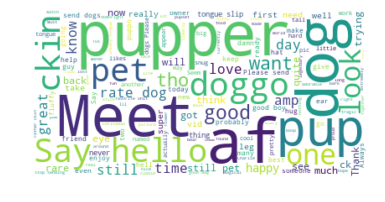

In [49]:
all_text = " ".join(rev for rev in twitter_clean.text)
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Number of images classified as dogs vs number of classified as not dogs in predictions

In [50]:
pred_len = image_pred_clean.shape[0]
dogs_in_predictions = [image_pred_clean.p1_dog.sum(), image_pred_clean.p2_dog.sum(),image_pred_clean.p3_dog.sum()]
not_dog_predictions = [pred_len - image_pred_clean.p1_dog.sum(), pred_len - image_pred_clean.p2_dog.sum(), pred_len - image_pred_clean.p3_dog.sum()]

In [51]:
dogs_in_predictions

[1532, 1553, 1499]

In [52]:
not_dog_predictions

[543, 522, 576]

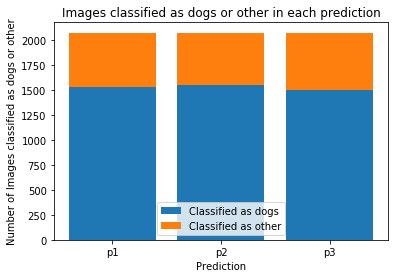

In [53]:
dog_nodog_labels = ["p1", "p2", "p3"]
dogs_bar = plt.bar(range(3), dogs_in_predictions)
nondogs_bar = plt.bar(range(3), not_dog_predictions, bottom=dogs_in_predictions)
plt.xticks(range(3), labels=dog_nodog_labels )
plt.xlabel("Prediction")
plt.ylabel("Number of Images classified as dogs or other")
plt.legend((dogs_bar[0], nondogs_bar[0]), ('Classified as dogs', 'Classified as other'))
plt.title("Images classified as dogs or other in each prediction")
plt.show()

## Average confidence level in predictions 

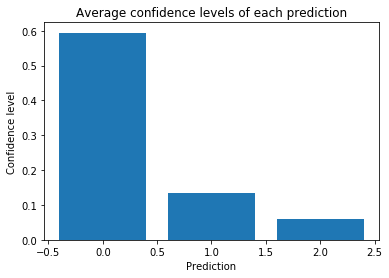

In [54]:
conf_levels = [image_pred_clean.p1_conf.mean(), image_pred_clean.p2_conf.mean(), image_pred_clean.p3_conf.mean()]
plt.bar(range(3), conf_levels)
plt.xlabel("Prediction")
plt.ylabel("Confidence level")
plt.title("Average confidence levels of each prediction")
plt.show()

The confidence level of predictions seem to be high for the first prediction and it decreases with further predictions.

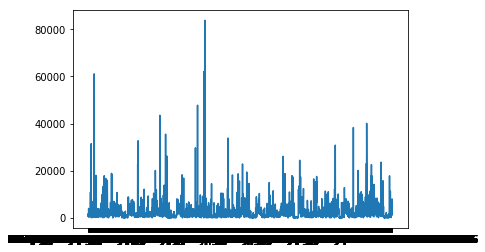

In [55]:
non_null = twitter_clean[~twitter_clean.timestamp.isnull()]
plt.plot(non_null.timestamp, non_null.retweet_count)
plt.show()

## Does rating affect likes?

In [56]:
import statsmodels.api as sm
twitter_clean["intercept"] = 1
test = twitter_clean[~twitter_clean.favorite_count.isnull()]
fav_model = sm.OLS(test["favorite_count"], test[["intercept", "rating_numerator"]])
fav_model_results = fav_model.fit()
fav_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.03374
Date:                Tue, 01 Jan 2019   Prob (F-statistic):              0.854
Time:                        17:26:00   Log-Likelihood:                -23601.
No. Observations:                2173   AIC:                         4.721e+04
Df Residuals:                    2171   BIC:                         4.722e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept         8575.9395    280.755     30.546      0.000    8025.364    9126.515
rating_numerator     1.0411      5.668      0.184      0.854     -10.074      12.157
==============================================================================
Omnibus:                     2054.682   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           102665.860
Skew:                           4.438   Prob(JB):                         0.00
Kurtosis:                      35.483   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above model, it is evident that the rating of a dog does not affect the number of likes that a tweet receives from the p-value. 